In [1]:
# presentation slide deck summarizing this this work is available at 
# https://docs.google.com/presentation/d/1KXXxF3RqjkVQ-vvFWSIMjpRbSLv08uHkw_72OidDVt0/edit?usp=sharing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

species_info = pd.read_csv("species_info.csv")
species_info = species_info.drop_duplicates(subset = 'scientific_name', keep = "first")
observations = pd.read_csv("observations.csv")

# The species_info data base has one entry per species, 
# giving its category, scientific_name and conservation status (some duplicates).
# The observations database has individual counts taken over 7 days
# by species (identified by scientific name) and by park.


In [2]:

# 
# Once duplicate entries are dropped from species_info, the two data bases match in 
# the count of species.
# A column is added to species info to contain the total counts of the species 
#  observed across parks
# species_info and observations data frames are merged into a new dataframe called
#    species_observations.
# Deeper dives look at species by category (e.g. mammals), by 
# conservation status ("threatened", "of concern", "endangered" and "in recovery"),
# and by differences in observations by park (four parks are in the observations df).
# 
# After analysis, it's clear that the observations database is fictional:
#     . No such databases are found when looking through national park websites/databases
#     . The counts for the gray wolf are above the total estimated population 
#.           by the parks online
#     . Larger numbers of some of the threatened and endangered species are observed 
#.          than expected
#     . Example: more observations of the "Yosemite toad" at Yellowstone than at Yosemite:
#         Yellowstone has only one toad species - and it's not the "Yosemite toad" 
     
# merge into one data frame
species_observations = pd.merge(observations, species_info,on =  "scientific_name")
print("species_observations:",species_observations. dtypes)
species_list = set(list(observations["scientific_name"]))
species_list = list(species_list)
cat_list = set(list(species_info["category"]))
cat_list = list(cat_list)
species_list.sort()
cat_list.sort()
print("\ncategory list : cat_list\n", cat_list)

# create a dictionary that maps scientific names to/from common names - useful utilities
sci_to_common = dict(zip(species_info.scientific_name, species_info.common_names))
common_to_sci = dict(zip(species_info.common_names, species_info.scientific_name))
# test dictionary
print(common_to_sci["Gray Wolf"])
print(sci_to_common["Canis lupus"])

print(common_to_sci["Red Wolf"])
print(sci_to_common["Canis rufus"])





species_observations: scientific_name        object
park_name              object
observations            int64
category               object
common_names           object
conservation_status    object
dtype: object

category list : cat_list
 ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']
Canis lupus
Gray Wolf
Canis rufus
Red Wolf


In [3]:
# Alphabetize the three dataframes by scientific name
print(len(observations))

species_info.sort_values(by = ["scientific_name"],inplace = True )
observations.sort_values(by = ["scientific_name"],inplace = True )
species_observations.sort_values(by = ["scientific_name"], inplace = True)

# add column to species_info to contain total number of observations

list_of_totals = [] 

counter = 0
for i in range(len(species_list)):
    total = 0
    name = species_list[i]   
    while counter <= 23295 and name == observations.iloc[counter,0]:
        total = total + observations.iloc[counter, 2]
        counter = counter + 1
    list_of_totals.append(total)   
species_info["total_observed"]= list_of_totals

print(species_info.dtypes)



23296
category               object
scientific_name        object
common_names           object
conservation_status    object
total_observed          int64
dtype: object


In [4]:
# investigate the categories of species and the categories of conservation_status
# replace all "nan" conservation status with "common" in species_info df

species_info['conservation_status'] = species_info['conservation_status'].replace(np.nan, "Common")
categories = pd.unique(species_info['category'])
categories = [i for i in categories if i]
conservation_status_list = pd.unique(species_info['conservation_status'])
conservation_status_list = [i for i in conservation_status_list if i]
print("\n List of Categories of Species:")
print(categories)
print("\n List of Conservation_status Categories:")
print(conservation_status_list)




 List of Categories of Species:
['Vascular Plant', 'Nonvascular Plant', 'Bird', 'Amphibian', 'Reptile', 'Mammal', 'Fish']

 List of Conservation_status Categories:
['Common', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']


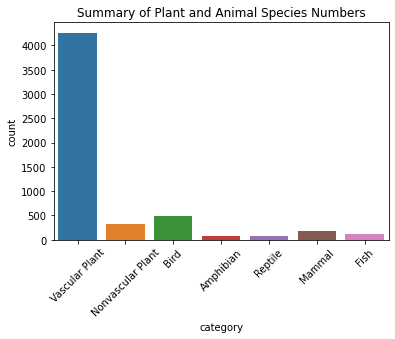

15  are endangered
9  are threatened
151  are of concern
3  are in recovery
5363  are common
animal categories:
 ['Bird', 'Amphibian', 'Reptile', 'Mammal', 'Fish'] 

plant categories:
 ['Vascular Plant', 'Nonvascular Plant'] 



<Figure size 432x288 with 0 Axes>

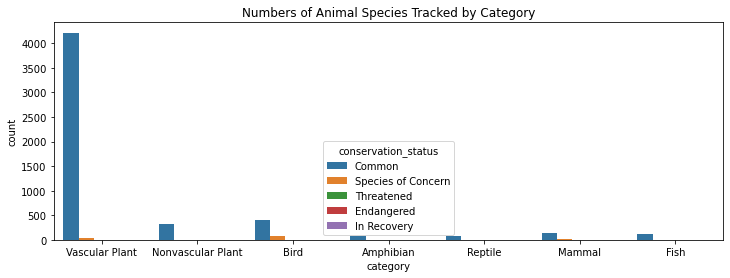

<Figure size 432x288 with 0 Axes>

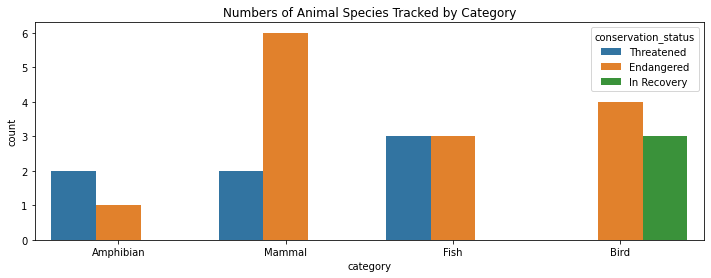

<Figure size 432x288 with 0 Axes>

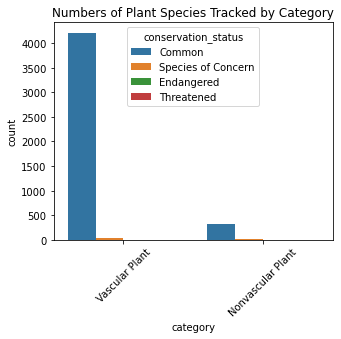

<Figure size 432x288 with 0 Axes>

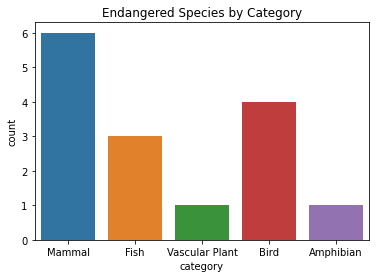

<Figure size 432x288 with 0 Axes>

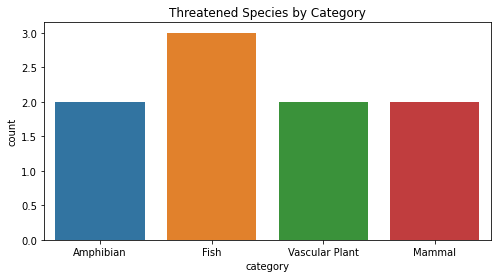

<Figure size 432x288 with 0 Axes>

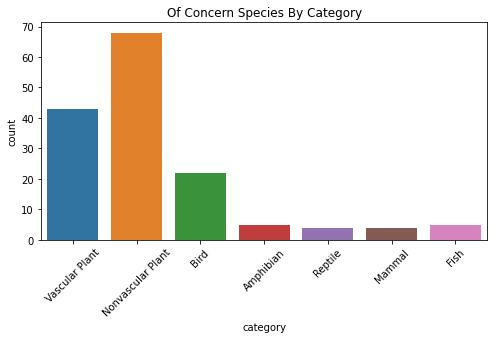

<Figure size 432x288 with 0 Axes>

In [5]:

#compare number of species tracked by categories and produce graphs

chart = sns.countplot(x="category", data=species_info)
chart.set_xticklabels(labels = categories,rotation=45)
chart.set_title("Summary of Plant and Animal Species Numbers")
plt.show()
plt.clf()


# observation: animals occur in smaller numbers than vascular plants. 
# Animals and plants should be analyzed separately.
# Create new databases of animals and plants and plot the number of species 
# in different categories of both the plant and animal data bases

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]

#create separate dfs for animals and plants

species_plant = filter_rows_by_values(species_info, "category", ["Vascular Plant", "Nonvascular Plant"])
species_animal = filter_rows_by_values(species_info, "category", ["Mammal", "Bird", 'Reptile', 'Amphibian', 'Fish' ])

#create separate data frames for threatened, endangered, etc, species

endangered_species = filter_rows_by_values(species_info,"conservation_status",["Endangered"])
print(len(endangered_species), " are endangered")
#print(endangered_species)
threatened_species = filter_rows_by_values(species_info,"conservation_status",["Threatened"])
print(len(threatened_species), " are threatened")
#print(threatened_species)
of_concern_species = filter_rows_by_values(species_info,"conservation_status",["Species of Concern"])
print(len(of_concern_species), " are of concern")
#print(of_concern_species.head())
in_recovery_species = filter_rows_by_values(species_info,"conservation_status",["In Recovery"])
print(len(in_recovery_species), " are in recovery")
#print(in_recovery_species)
common_species = filter_rows_by_values(species_info,'conservation_status',["Common"])
print(len(common_species), " are common")

#create lists for animals and plants categories

categories_animal = list(pd.unique(species_animal['category']))
#print("\n")
categories_plant = list(pd.unique(species_plant['category']))
print("animal categories:\n",categories_animal, "\n")
print("plant categories:\n",categories_plant, "\n")
plt.clf()

fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

chart = sns.countplot(x = "category", ax=ax, data=species_info, hue = "conservation_status")
chart.set_title("Numbers of Animal Species Tracked by Category")
plt.show()
plt.clf()
print("\n")
plt.clf()

fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
noncommon_animals = filter_rows_by_values(species_animal, "conservation_status", ["Threatened", "In Recovery", "Endangered"])
chart = sns.countplot(x = "category", ax=ax, data=noncommon_animals, hue = "conservation_status")
chart.set_title("Numbers of Animal Species Tracked by Category")
plt.show()
plt.clf()
print("\n")

fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.countplot(x="category", data=species_plant, hue = "conservation_status")
chart.set_xticklabels(labels = categories_plant,rotation=45)
chart.set_title("Numbers of Plant Species Tracked by Category")
plt.show()
plt.clf()

#plot endangered species
print("\n")
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.countplot(x = "category", ax=ax, data=endangered_species)
chart.set_title("Endangered Species by Category")
plt.show()
plt.clf()
print("\n")

#plot threatened species
print("\n")
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.countplot(x = "category", ax=ax, data=threatened_species)
chart.set_title("Threatened Species by Category")
plt.show()
plt.clf()
print("\n")

#plot "of concern" species categories
print("\n")
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.countplot(x = "category", ax=ax, data=of_concern_species)
chart.set_xticklabels(labels = categories,rotation=45)
chart.set_title("Of Concern Species By Category")
plt.show()
plt.clf()
print("\n")


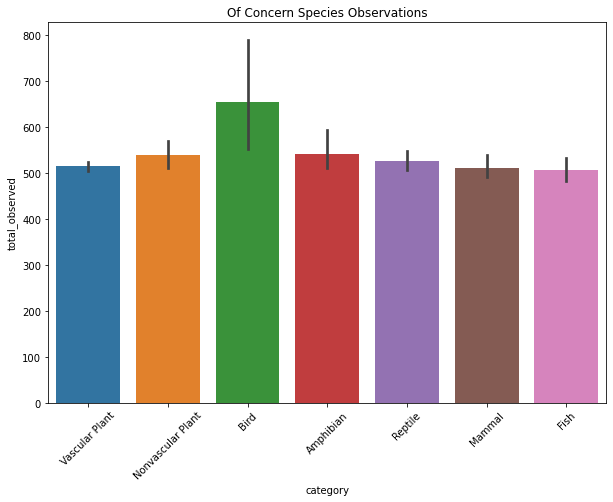

<Figure size 432x288 with 0 Axes>

In [6]:


# create graphs for endangered and threatened species indicating how many
# observations there were.

#plot "of concern" species categories
#print(of_concern_species.head(20))
#print(of_concern_species.dtypes)
print("\n")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x = "category",y = "total_observed", ax=ax, data=of_concern_species)
chart.set_xticklabels(labels = categories,rotation=45)
chart.set_title("Of Concern Species Observations")
plt.show()
plt.clf()
print("\n")
        

species_observations columns:
 Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status'],
      dtype='object')
list of bird Conservation status:
 ['Common' 'Species of Concern' 'In Recovery' 'Endangered']
number of common birds:  413
number of observed mammals: 176
number of observed_birds 5229
category               object
scientific_name        object
common_names           object
conservation_status    object
total_observed          int64
dtype: object
['Common', 'Species of Concern', 'Endangered', 'Threatened']
category               object
scientific_name        object
common_names           object
conservation_status    object
total_observed          int64
dtype: object
['Gray Wolf' 'Red Wolf'
 'Carolina Northern Flying Squirrel, Northern Flying Squirrel'
 'Gray Myotis' 'Indiana Bat, Indiana Or Social Myotis'
 'Sierra Nevada Bighorn Sheep']


<Figure size 432x288 with 0 Axes>

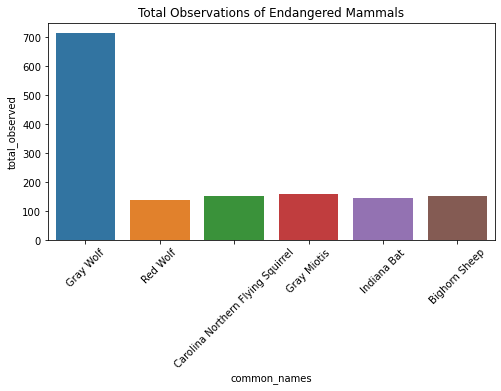

<Figure size 432x288 with 0 Axes>

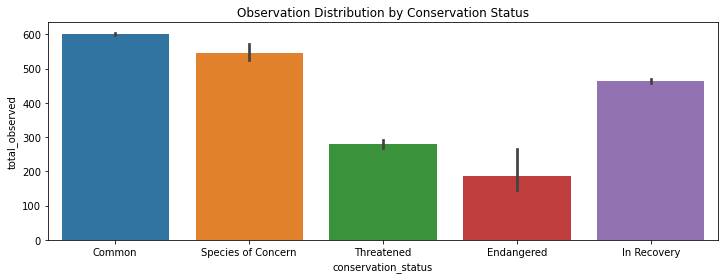

category               object
scientific_name        object
common_names           object
conservation_status    object
total_observed          int64
dtype: object
['Whooping Crane' 'California Condor' 'Red-Cockaded Woodpecker'
 "Bachman's Warbler, Bachman's Wood Warbler"]


<Figure size 432x288 with 0 Axes>

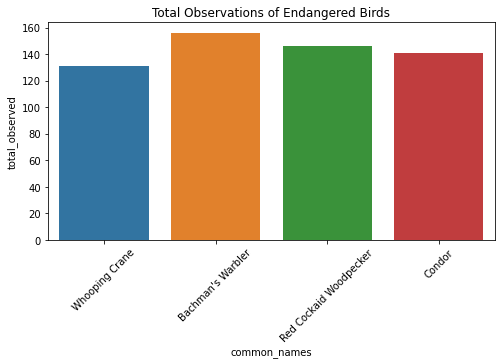

<Figure size 432x288 with 0 Axes>

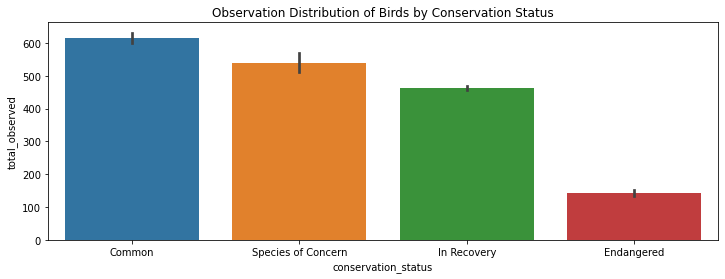

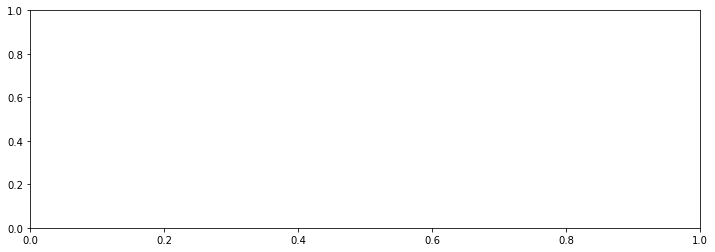

<Figure size 432x288 with 0 Axes>

In [8]:
# 176 unique species of mammals were tracked across different parks
# categorize mammals tracked by conservation status and graph
# do the same for birds
# look at endangered mammals and birds
print("species_observations columns:\n",species_observations.columns)

observed_mammals = filter_rows_by_values(species_info, "category", ["Mammal"])
list_of_mammals = pd.unique(observed_mammals["scientific_name"])
observed_birds = filter_rows_by_values(species_info, "category", ["Bird"])
list_of_birds = pd.unique(species_observations["common_names"])
list_of_bird_conservation_status = pd.unique(observed_birds["conservation_status"])
print("list of bird Conservation status:\n",list_of_bird_conservation_status)
list_of_birds_common = filter_rows_by_values(observed_birds, "conservation_status", ["Common"])
print("number of common birds: ", len(list_of_birds_common))
print("number of observed mammals:",len(observed_mammals))
print("number of observed_birds",len(list_of_birds) )
#print(list_of_mammals)
print(observed_mammals.dtypes)
categories_animal = list(pd.unique(species_animal['category']))
list_of_conservation_categories = list(pd.unique(observed_mammals["conservation_status"]))
print(list_of_conservation_categories)

# create separate dfs for endangered mammals and graph
observed_endangered_mammals = filter_rows_by_values(observed_mammals, "conservation_status", ["Endangered"])
list_of_endangered_mammals = pd.unique(observed_endangered_mammals["common_names"])
sci_list_enangered_mammals= pd.unique(observed_endangered_mammals["scientific_name"])
print(observed_endangered_mammals.dtypes)
print(list_of_endangered_mammals)

#graph endangered_mammals observations                                     
plt.clf()
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x="common_names",y = "total_observed", data=observed_endangered_mammals)
chart.set_xticklabels(labels = ["Gray Wolf", "Red Wolf", "Carolina Northern Flying Squirrel", "Gray Miotis", "Indiana Bat", "Bighorn Sheep"],rotation=45)
chart.set_title("Total Observations of Endangered Mammals")
plt.show()

plt.clf()
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x="conservation_status",y = "total_observed", data= species_info)
#chart.set_xticklabels(labels = list_of_conservation_categories,rotation=45)
chart.set_title("Observation Distribution by Conservation Status")
plt.show()

#create separate dfs for birds and graph
observed_endangered_birds = filter_rows_by_values(observed_birds, "conservation_status", ["Endangered"])
list_of_endangered_birds = pd.unique(observed_endangered_birds["common_names"])
sci_list_endangered_birds= pd.unique(observed_endangered_birds["scientific_name"])
print(observed_endangered_birds.dtypes)
print(list_of_endangered_birds)
#print(observed_endangered_birds["total_observations"])                                     

plt.clf()
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x="common_names",y = "total_observed", data=observed_endangered_birds)
#chart.set_xticks([2,4,6,8])
chart.set_xticklabels(labels = ['Whooping Crane', "Bachman's Warbler", "Red Cockaid Woodpecker", "Condor"],rotation=45)
chart.set_title("Total Observations of Endangered Birds")
plt.show()

plt.clf()
fig_dims = (12,4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x = "conservation_status", y = "total_observed", data = observed_birds)
fig, ax = plt.subplots(figsize=fig_dims)
chart.set_title("Observation Distribution of Birds by Conservation Status")
plt.show()
plt.clf()




In [9]:
# look at all endangered species to see how many species are endangered

endangered_species_info = filter_rows_by_values(species_info,"conservation_status", ["Endangered"])
print("number of endangered species: ", len(endangered_species_info))


number of endangered species:  15


category:  Nonvascular Plant
category:  Bird
category:  Amphibian
category:  Reptile
category:  Mammal
category:  Fish
total  Nonvascular Plant  is  333.0
total  Bird  is  488.0
total  Amphibian  is  79.0
total  Reptile  is  78.0
total  Mammal  is  176.0
total  Fish  is  125.0
percent_category_info:
                                  Name  Total  Endangered  Threatened  \
Nonvascular Plant  Nonvascular Plant  333.0    0.000000    0.000000   
Bird                            Bird  488.0    0.819672    0.000000   
Amphibian                  Amphibian   79.0    1.265823    2.531646   
Reptile                      Reptile   78.0    0.000000    0.000000   
Mammal                        Mammal  176.0    3.409091    1.136364   
Fish                            Fish  125.0    2.400000    2.400000   

                   In Recovery  Species of Concern     Common  
Nonvascular Plant     0.000000            1.501502  98.498498  
Bird                  0.614754           13.934426  84.631148  
Amphibi

<Figure size 432x288 with 0 Axes>

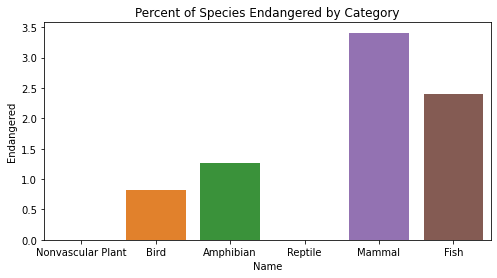

<Figure size 432x288 with 0 Axes>

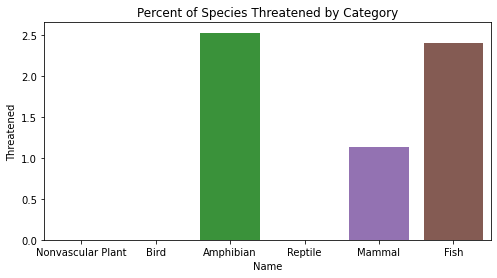

<Figure size 432x288 with 0 Axes>

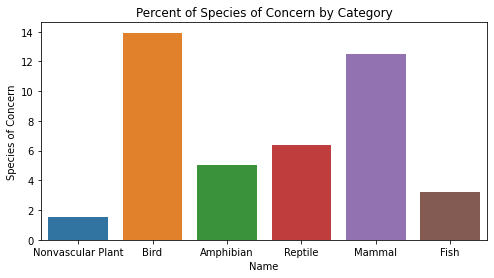

<Figure size 432x288 with 0 Axes>

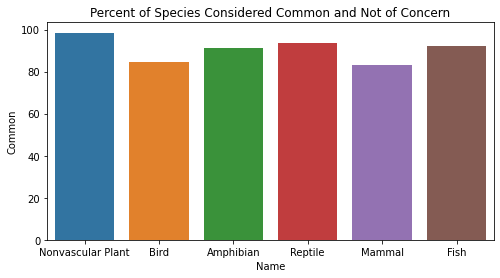

In [10]:
# Question: Look at Percent of Animal Categories that are Endangered or threatened.
# Create new (short) df that contains summary information on species categories and 
# their conservation status. Calculate percents and graph


#eliminate vascular plant from species_info
species_info.drop(species_info.index[species_info['category'] == "Vascular Plant"], inplace=True)
categories = pd.unique(species_info["category"])
categories = [i for i in categories if i]

#create new dataframe that looks at conservation information by species categories

category_info = pd.DataFrame( columns = ["Name",'Total', "Endangered", "Threatened", "In Recovery", "Species of Concern", "Common"],
    dtype = "int",index = categories)
percent_category_info = pd.DataFrame(columns = ["Name",'Total', "Endangered", "Threatened", "In Recovery", "Species of Concern", "Common"],
    dtype = "int")
category_info["Name"] = categories
category_info.fillna(0, inplace = True)
species_info.sort_values(["category","conservation_status"], ascending=False, inplace = True)


for i in range(len(categories)):
    counter = 0
    cat =  categories[i] 
    #print(species_info.iloc[10, 0], cat, " line 23")
    print("category: ", cat)    
    for j in range(len(species_info)):   
        if species_info.iloc[j,0] != cat:
            continue
        category_info.at[cat, "Total"] += 1
        if species_info.iloc[j, 3] == "Endangered":
            category_info.at[cat, "Endangered"] += 1
            continue
        if species_info.iloc[j,3] == "Threatened": 
            category_info.at[cat, "Threatened"] += 1
            continue
        if species_info.iloc[j,3] == "In Recovery":
            category_info.at[cat, "In Recovery"] += 1
            continue
        if species_info.iloc[j,3] == "Common":
            category_info.at[cat, "Common"] += 1
            continue
        if species_info.iloc[j, 3] == "Species of Concern":
            category_info.at[cat, "Species of Concern"] += 1
            continue
    continue       

# Normalize by looking at Percent rather than total numbers

percent_category_info = category_info
for i in range(len(percent_category_info)): 
    total = percent_category_info.iloc[i,1]
    print("total ", percent_category_info.iloc[i,0], " is ", total)
    for k in range(2,7):
        percent_category_info.iloc[i,k]= percent_category_info.iloc[i,k]/total * 100
print("percent_category_info:\n ", percent_category_info)        
        
#Graph Percents to Compare Categories

plt.clf()
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
#chart = sns.barplot(x = "Name", y = ["Endangered", "Threatened", "Species of Concern"],data = percent_category_info)
chart = sns.barplot(x = "Name", y = "Endangered",data = percent_category_info)#chart.set_xticklabels(labels = list_of_conservation_categories,rotation=45)
chart.set_title("Percent of Species Endangered by Category")
plt.show() 

plt.clf()
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x = "Name", y = "Threatened",data = percent_category_info)#chart.set_xticklabels(labels = list_of_conservation_categories,rotation=45)
chart.set_title("Percent of Species Threatened by Category")
plt.show() 

plt.clf()
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x = "Name", y = "Species of Concern",data = percent_category_info)#chart.set_xticklabels(labels = list_of_conservation_categories,rotation=45)
chart.set_title("Percent of Species of Concern by Category")
plt.show()

plt.clf()
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x = "Name", y = "Common",data = percent_category_info)#chart.set_xticklabels(labels = list_of_conservation_categories,rotation=45)
chart.set_title("Percent of Species Considered Common and Not of Concern")
plt.show()
       
#Conclusion: Mammals and Birds have the largest percent of species that are endangered, threatened, or of concern  


In [11]:
# sort and select least observed 20 species for display
print(species_info.dtypes)
species_info.sort_values(by = "total_observed", ascending = True, inplace=True)
print(species_info.head(20))


category               object
scientific_name        object
common_names           object
conservation_status    object
total_observed          int64
dtype: object
       category                scientific_name  \
173        Bird                 Grus americana   
9        Mammal                    Canis rufus   
276        Bird            Vermivora bachmanii   
570        Fish                Noturus baileyi   
4601  Amphibian                   Rana sierrae   
39       Mammal                 Myotis sodalis   
343        Bird              Picoides borealis   
3275       Fish              Chasmistes liorus   
72       Mammal   Glaucomys sabrinus coloratus   
4446     Mammal        Ovis canadensis sierrae   
4505       Bird        Gymnogyps californianus   
34       Mammal              Myotis grisescens   
540        Fish           Etheostoma percnurum   
490        Fish              Erimonax monachus   
4597  Amphibian               Anaxyrus canorus   
3032     Mammal        Ursus arctos 

['Gray Wolf', 'Red Wolf', 'Carolina Northern Flying Squirrel, Northern Flying Squirrel', 'Gray Myotis', 'Indiana Bat, Indiana Or Social Myotis', 'Sierra Nevada Bighorn Sheep']
endangered species observations: 
                     scientific_name                            park_name  \
20353                   Canis lupus  Great Smoky Mountains National Park   
1294                    Canis lupus               Yosemite National Park   
10268                   Canis lupus            Yellowstone National Park   
1766                    Canis lupus                  Bryce National Park   
10907                   Canis lupus            Yellowstone National Park   
19987                   Canis lupus               Yosemite National Park   
19330                   Canis lupus               Yosemite National Park   
9884                    Canis lupus                  Bryce National Park   
10190                   Canis lupus  Great Smoky Mountains National Park   
17756                   Canis

<Figure size 432x288 with 0 Axes>

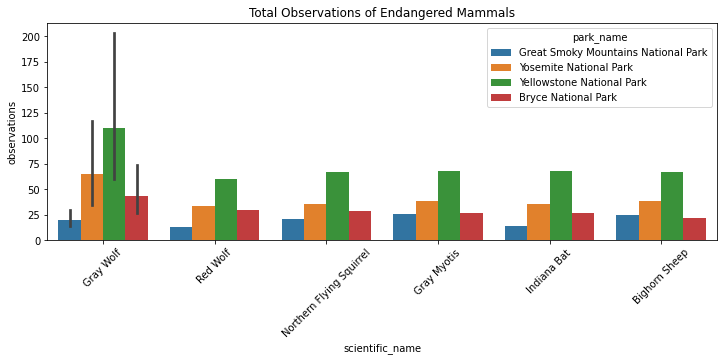

scientific_name        object
park_name              object
observations            int64
category               object
common_names           object
conservation_status    object
dtype: object
23296


<Figure size 432x288 with 0 Axes>

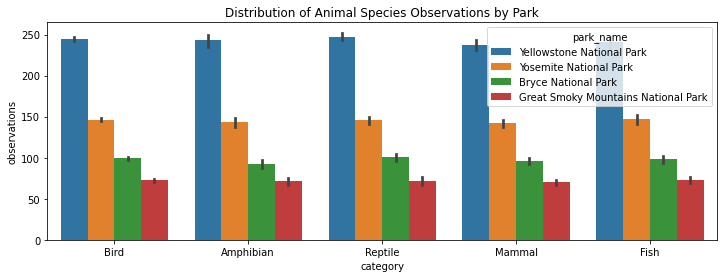

In [12]:
# Look at endangered mammal observations by park
park_endangered_observations = filter_rows_by_values(observations,"scientific_name", sci_list_enangered_mammals)
list_sci_names_endangered = list(park_endangered_observations.scientific_name.unique())
#use common names for better understanding of non-scientist audience
common_name_endangered_list = []
for name in list_sci_names_endangered:
    common_name_endangered_list.append(sci_to_common[name])
print(common_name_endangered_list)
print("endangered species observations: \n", park_endangered_observations)    
plt.clf()
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x="scientific_name",y = "observations", data=park_endangered_observations, hue = "park_name")
chart.set_xticklabels(labels = ["Gray Wolf", "Red Wolf", "Northern Flying Squirrel", "Gray Myotis","Indiana Bat","Bighorn Sheep"], rotation=45)
chart.set_title("Total Observations of Endangered Mammals")
plt.show()
#
observations_animal = filter_rows_by_values(species_observations, "category", ["Mammal", "Bird", 'Reptile', 'Amphibian', 'Fish' ])


print(species_observations.dtypes)
print(len(species_observations))
plt.clf()
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x= "category" ,y = "observations" ,data = observations_animal, hue = "park_name")
#chart.set_xticklabels(labels = common_name_endangered_list,rotation=45)
chart.set_title("Distribution of Animal Species Observations by Park")
plt.show()





      scientific_name                            park_name  observations
20353     Canis lupus  Great Smoky Mountains National Park            30
1294      Canis lupus               Yosemite National Park            35
10268     Canis lupus            Yellowstone National Park            60
1766      Canis lupus                  Bryce National Park            27
10907     Canis lupus            Yellowstone National Park            67
19987     Canis lupus               Yosemite National Park            44
19330     Canis lupus               Yosemite National Park           117
9884      Canis lupus                  Bryce National Park            74
10190     Canis lupus  Great Smoky Mountains National Park            15
17756     Canis lupus  Great Smoky Mountains National Park            14
13427     Canis lupus            Yellowstone National Park           203
7346      Canis lupus                  Bryce National Park            29
      scientific_name                            pa

<Figure size 432x288 with 0 Axes>

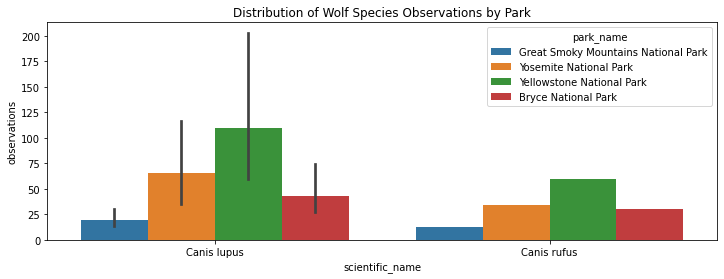

<Figure size 432x288 with 0 Axes>

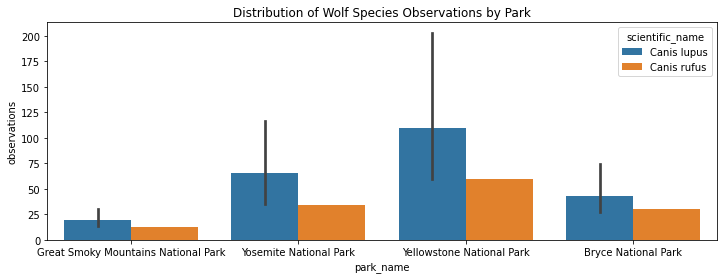

In [13]:
# note that the difference in display between the Gray Wolf and other endangered
# species is attributable to multiple observations for single parks (each had 3
# observations of gray wolves). One major problem: Yellowstone, according to it's 
# website, in 2020 had somewhere an estimated 123 gray wolves. The observation
# count totals for Yellowstone exceed this number...

#explore observations of the gray wolf
gray_wolf_obs = filter_rows_by_values(observations, "scientific_name", ["Canis lupus"])
print(gray_wolf_obs)


#explore observations of the red wolf, Canis rufus

red_wolf_obs = filter_rows_by_values(observations, "scientific_name", ["Canis rufus"])

print(red_wolf_obs)

wolves_observations = filter_rows_by_values(observations, "scientific_name", ["Canis lupus", "Canis rufus"])
print("wolves observations\n")
print(wolves_observations)
plt.clf()
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x= "scientific_name" ,y = "observations" ,data = wolves_observations, hue = "park_name")
#chart.set_xticklabels(labels = common_name_endangered_list,rotation=45)
chart.set_title("Distribution of Wolf Species Observations by Park")
plt.show()

plt.clf()
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x= "park_name" ,y = "observations" ,data = wolves_observations, hue = "scientific_name")
#chart.set_xticklabels(labels = common_name_endangered_list,rotation=45)
chart.set_title("Distribution of Wolf Species Observations by Park")
plt.show()





In [14]:
# Use statistical analysis of data to see what variations there are in
# Species within categories
# Conservation Status by categories of plants and animals
# Number of Observations within a conservation category by species
# Comparison of Parks by Observations by Category

# compare gray_wolf observations of Yellowtone and Yosemite to see if they are statistically
# similar (reflect a common mean)
yosemite_gray_wolf = filter_rows_by_values(gray_wolf_obs, "park_name", ["Yosemite National Park"])
yellowstone_gray_wolf = filter_rows_by_values(gray_wolf_obs, "park_name", ["Yellowstone National Park"])
tstat, pval = ttest_ind(yosemite_gray_wolf.observations, yellowstone_gray_wolf.observations)
print("Comparison of gray wolf observations in Yosemite and Yellowstone")
print(tstat, ": tstat")
print(pval, ": pval")
# the observations of the gray wolf at Yosemite and Yellowstone possibly reflect similar
# populations; pval confirms that the results are not likely to have occurred by chance. 

#compare conservation statuses (threatened) for the two parks
yosemite_observations = filter_rows_by_values(species_observations, "park_name", ["Yosemite National Park"])
smoky_mts_observations = filter_rows_by_values(species_observations, "park_name", ["Great Smoky Mountains National Park"])
smoky_mts_threatened = filter_rows_by_values(smoky_mts_observations, "conservation_status", ["Threatened"])
yosemite_threatened = filter_rows_by_values(yosemite_observations,"conservation_status", ["Threatened"])
yellowstone_observations = filter_rows_by_values(species_observations, "park_name", ["Yellowstone National Park"])
yellowstone_threatened = filter_rows_by_values(yellowstone_observations,"conservation_status", ["Threatened"])

bryce_observations = filter_rows_by_values(species_observations, "park_name", ["Bryce National Park"])
bryce_threatened = filter_rows_by_values(bryce_observations, "conservation_status", ["Threatened"])
print("THREATENED: \n")
print("yellowstone\n",yellowstone_threatened)
print("yosemite\n", yosemite_threatened)
print("great smpkey mountains:\n", smoky_mts_threatened)
print("Bryce:\n", bryce_threatened)

# list of threatened species observed is identical for the four parks; would not expect 
# geographically disparate parks to all observe the same threatened species


Comparison of gray wolf observations in Yosemite and Yellowstone
-0.838089488987076 : tstat
0.44913925275727257 : pval
THREATENED: 

yellowstone
                      scientific_name                  park_name  observations  \
2103                Anaxyrus canorus  Yellowstone National Park           114   
12958              Erimonax monachus  Yellowstone National Park           109   
12828            Isotria medeoloides  Yellowstone National Park           114   
11337         Myotis septentrionalis  Yellowstone National Park           143   
20717            Noturus flavipinnis  Yellowstone National Park           126   
16506  Oncorhynchus clarkii henshawi  Yellowstone National Park           111   
1487                  Rana draytonii  Yellowstone National Park           141   
16430             Spiraea virginiana  Yellowstone National Park           114   
19975        Ursus arctos horribilis  Yellowstone National Park           115   

             category                      